# Palmer Penguins Modeling

GSB 544-01

Elizabeth Berry

11/3/23

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [50]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins_data = pd.get_dummies(penguins, columns=["species", "sex", "island"])

print(penguins_data)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
3               NaN            NaN                NaN          NaN  2007   
4              36.7           19.3              193.0       3450.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     species_Adelie  species_Chinstrap  species_Gentoo  sex_female  sex_male  \
0      

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

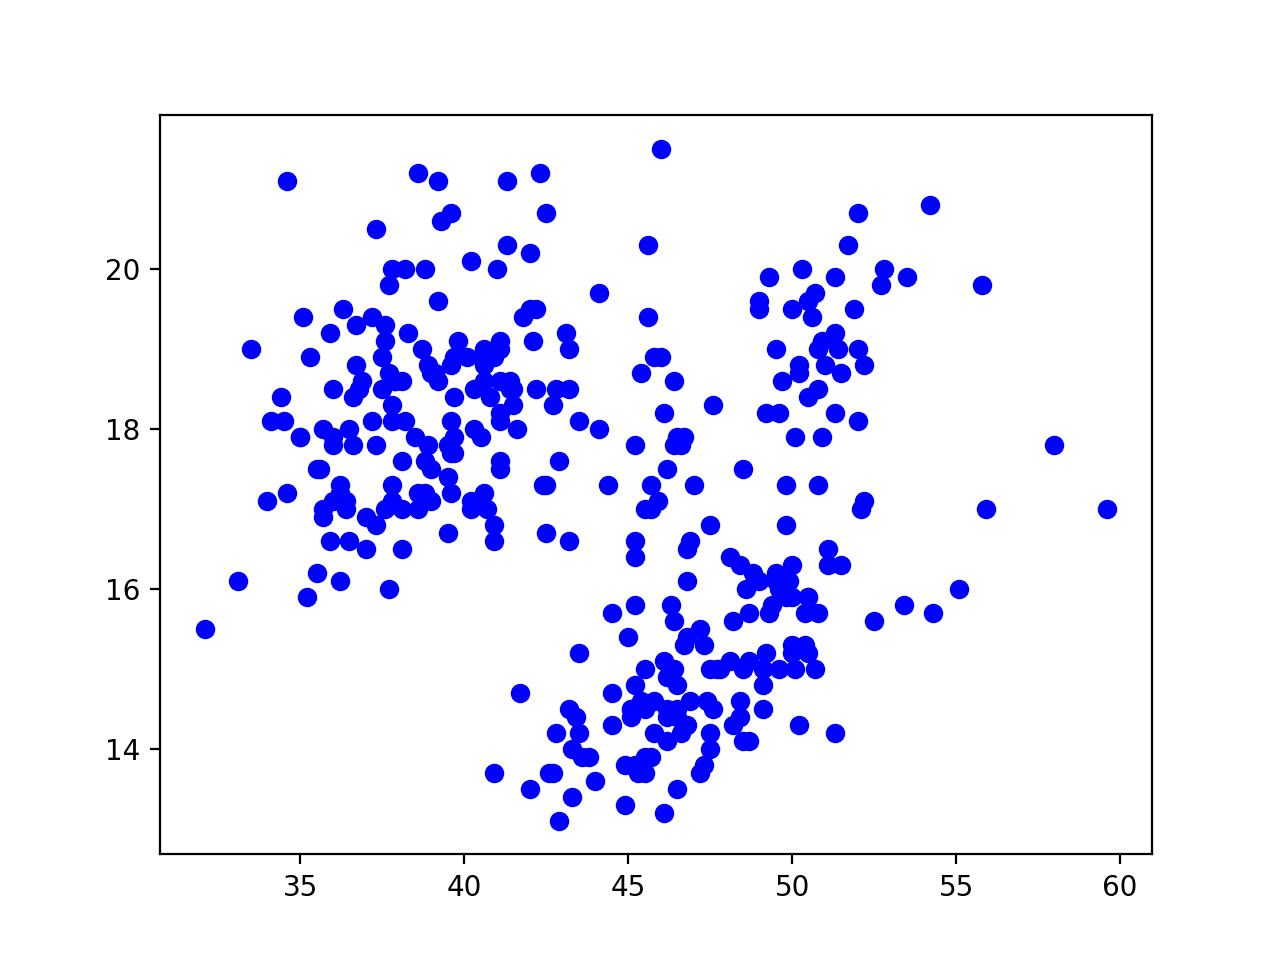

In [51]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import *

penguins_data = penguins_data.dropna()
X = penguins_data[['bill_length_mm']]
y = penguins_data['bill_depth_mm']
plt.scatter(X, y, color='blue', label='Scatterplot')

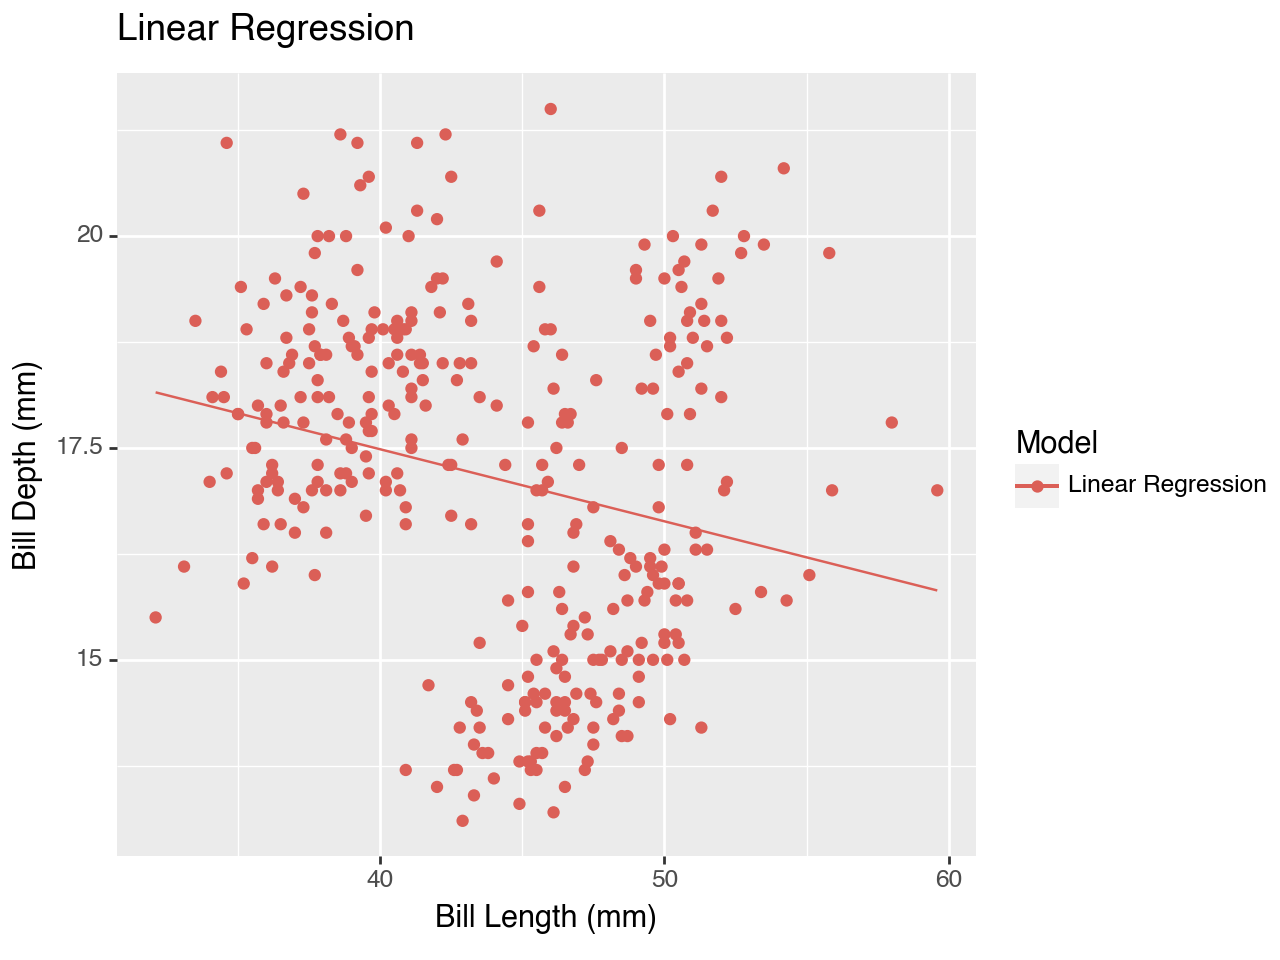

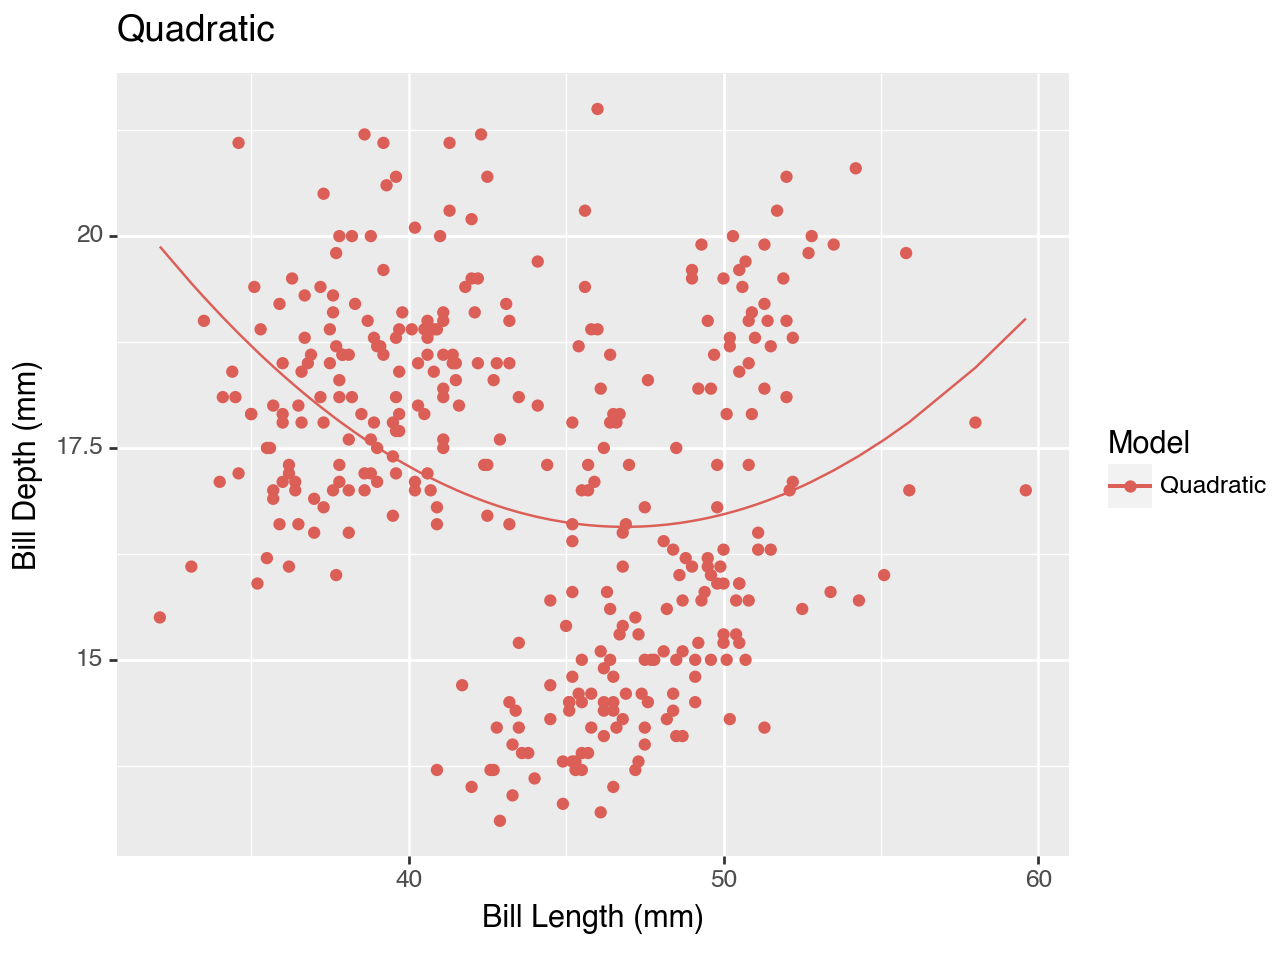

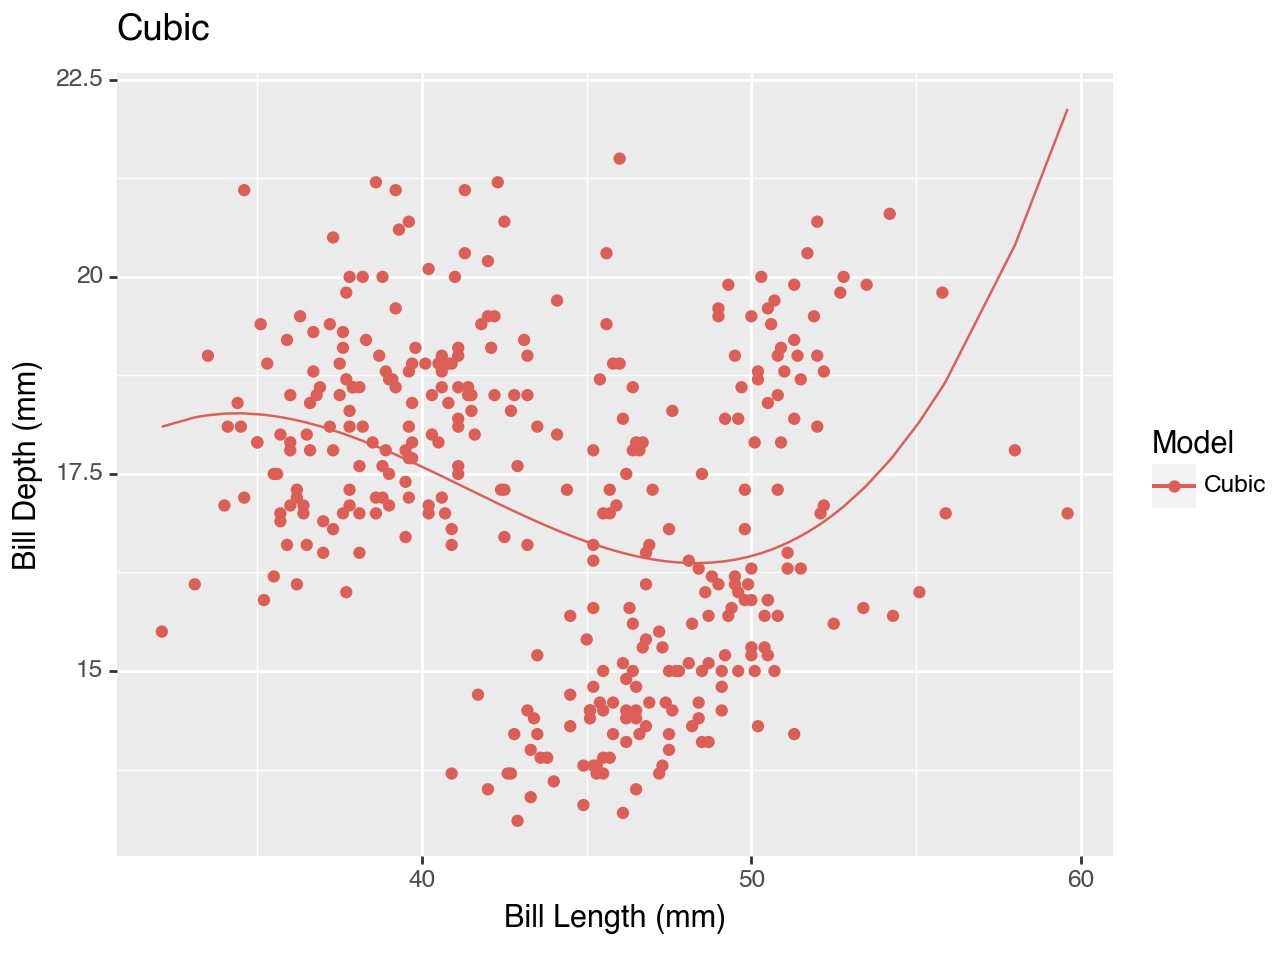

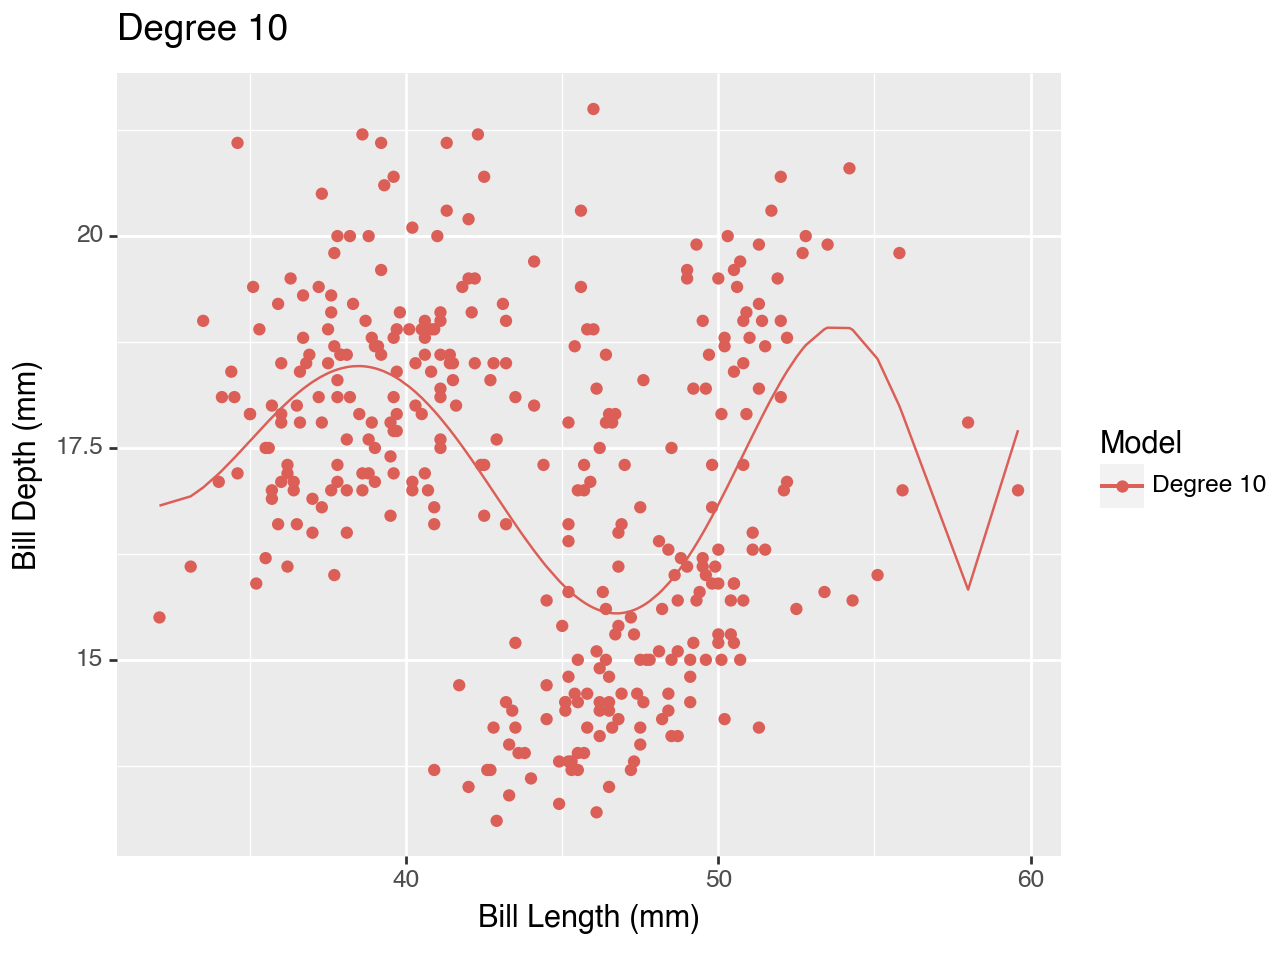

In [52]:
models = {
    'Linear Regression': LinearRegression(),
    'Quadratic': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())
    ]),
    'Cubic': Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('model', LinearRegression())
    ]),
    'Degree 10': Pipeline([
        ('poly', PolynomialFeatures(degree=10)),
        ('model', LinearRegression())
    ])
}

plots = []
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    
    df = pd.DataFrame({'X': X['bill_length_mm'], 'y': y, 'y_pred': y_pred, 'Model': name})
    
    p = (
        ggplot(df, aes(x='X', y='y', color='Model')) +
        geom_point() +
        geom_line(aes(y='y_pred')) +
        labs(x='Bill Length (mm)', y='Bill Depth (mm)', color='Model') +
        ggtitle(name)
    )
    
    plots.append(p)

for p in plots:
    print(p)

In [49]:
# Fit and evaluate the models
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"{name} R2 Score: {r2}")

Linear Regression R2 Score: 0.05524985186237463
Quadratic R2 Score: 0.11356865429193064
Cubic R2 Score: 0.1424877523321535
Degree 10 R2 Score: 0.2925030870312384


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

- The linear, quadratic, and cubic models underfit the data because there is a lot of variance between the observations and the predicted values with no room for the curves/lines to adjust based on data patterns.
- The degree 10 model is overfitting the data because while it does account for the variability in the observations, the prediction line dips in the opposite direction of where there are observations that it appears it should be accounting for.
- Of these models, the cubic model is fits the model best because while there is a lot of variance between the observations and the predicted values, it better accounts for the pattern of observations without trying to fit the data too well. In reality, a model somewhere between degrees 3 and 10 would be ideal for fitting the data better.